In [1]:
from glob import glob
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
# load all en ja zh json file paths
en_story_path = 'GAMEDATA/ArknightsGameData/en_US/gamedata/story'
ja_story_path = 'GAMEDATA/ArknightsGameData/ja_JP/gamedata/story'
zh_story_path = 'GAMEDATA/ArknightsGameData/zh_CN/gamedata/story'

skip_count = 0
en_story_files, ja_story_files, zh_story_files = [], [], []
for zh_file in tqdm(glob(f'{zh_story_path}/**/*.txt', recursive=True)):
    en_file = zh_file.replace('zh_CN', 'en_US')
    ja_file = zh_file.replace('zh_CN', 'ja_JP')
    if not os.path.exists(en_file) or not os.path.exists(ja_file):
        skip_count += 1
        continue
    en_story_files.append(en_file)
    ja_story_files.append(ja_file)
    zh_story_files.append(zh_file)

print(f'Skip {skip_count} files, {len(en_story_files)} files left.')

/tmp/ipykernel_20720/211421219.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for zh_file in tqdm(glob(f'{zh_story_path}/**/*.txt', recursive=True)):


  0%|          | 0/3004 [00:00<?, ?it/s]

Skip 597 files, 2407 files left.


In [3]:
# load all en ja zh txt file into df
# empty line should be removed
# should remove lines like: [some word]
regex = re.compile(r'^(\[[^\]]+\][\n]*)$')

def read_file(file_path):
    lines = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = line.strip()
            if line == '':
                continue
            elif regex.match(line):
                continue
            lines.append(line)

    return lines

df = pd.DataFrame(columns=['en', 'ja', 'zh'])
pbar = tqdm(zip(en_story_files, ja_story_files, zh_story_files), total=len(en_story_files))
for en_file, ja_file, zh_file in pbar:
    # show filename on progress bar
    pbar.set_description(f'Processing {en_file}')

    en_story_text = read_file(en_file)
    ja_story_text = read_file(ja_file)
    zh_story_text = read_file(zh_file)

    if len(en_story_text) != len(ja_story_text) or len(en_story_text) != len(zh_story_text):
        print(f'Warning: length of {en_file} is not equal to {ja_file} or {zh_file}')
        print(f'length of en: {len(en_story_text)}, ja: {len(ja_story_text)}, zh: {len(zh_story_text)}')
        continue


    df =  pd.concat([
        df, pd.DataFrame({
            'en': en_story_text,
            'ja': ja_story_text,
            'zh': zh_story_text})
    ], ignore_index=True)
df

/tmp/ipykernel_20720/3244970516.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(zip(en_story_files, ja_story_files, zh_story_files), total=len(en_story_files))


  0%|          | 0/2407 [00:00<?, ?it/s]

length of en: 345, ja: 345, zh: 338
length of en: 339, ja: 339, zh: 324
length of en: 428, ja: 428, zh: 427
length of en: 226, ja: 226, zh: 223
length of en: 214, ja: 214, zh: 213
length of en: 6, ja: 6, zh: 5
length of en: 6, ja: 6, zh: 5
length of en: 312, ja: 312, zh: 311
length of en: 144, ja: 144, zh: 139
length of en: 310, ja: 310, zh: 295
length of en: 139, ja: 139, zh: 133
length of en: 42, ja: 42, zh: 45
length of en: 15, ja: 15, zh: 16
length of en: 17, ja: 17, zh: 18
length of en: 19, ja: 19, zh: 20


,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
173265,"[Dialog(head=""char_290_vigna"", delay=0.5)]It's...","[Dialog(head=""char_290_vigna"", delay=0.5)]こういう...","[Dialog(head=""char_290_vigna"", delay=0.5)]想不到华..."
173266,"[Dialog(head=""char_171_bldsk"", delay=0.5)]Of c...","[Dialog(head=""char_171_bldsk"", delay=0.5)]もちろん...","[Dialog(head=""char_171_bldsk"", delay=0.5)]当然你们..."
173267,"[Dialog(head=""char_311_mudrok"", delay=1)]I wil...","[Dialog(head=""char_311_mudrok"", delay=1)]ブラッドブ...","[Dialog(head=""char_311_mudrok"", delay=1)]血魔，我先..."
173268,"[Dialog(head=""char_290_vigna"", delay=0.5)]I th...","[Dialog(head=""char_290_vigna"", delay=0.5)]あたしも...","[Dialog(head=""char_290_vigna"", delay=0.5)]我好像也..."


In [4]:
# drop duplicate
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
df

,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
173265,"[Dialog(head=""char_290_vigna"", delay=0.5)]It's...","[Dialog(head=""char_290_vigna"", delay=0.5)]こういう...","[Dialog(head=""char_290_vigna"", delay=0.5)]想不到华..."
173266,"[Dialog(head=""char_171_bldsk"", delay=0.5)]Of c...","[Dialog(head=""char_171_bldsk"", delay=0.5)]もちろん...","[Dialog(head=""char_171_bldsk"", delay=0.5)]当然你们..."
173267,"[Dialog(head=""char_311_mudrok"", delay=1)]I wil...","[Dialog(head=""char_311_mudrok"", delay=1)]ブラッドブ...","[Dialog(head=""char_311_mudrok"", delay=1)]血魔，我先..."
173268,"[Dialog(head=""char_290_vigna"", delay=0.5)]I th...","[Dialog(head=""char_290_vigna"", delay=0.5)]あたしも...","[Dialog(head=""char_290_vigna"", delay=0.5)]我好像也..."


In [5]:
# remove name tag of dialog
# which is like: [...]   dialog, just keep dialog
regex = re.compile(r'^(\[[^\]]+\][ ]*)')
df['en'] = df['en'].apply(lambda x: regex.sub('', x))
df['ja'] = df['ja'].apply(lambda x: regex.sub('', x))
df['zh'] = df['zh'].apply(lambda x: regex.sub('', x))
df

/tmp/ipykernel_20720/3367292161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en'] = df['en'].apply(lambda x: regex.sub('', x))
/tmp/ipykernel_20720/3367292161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ja'] = df['ja'].apply(lambda x: regex.sub('', x))
/tmp/ipykernel_20720/3367292161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。


In [6]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。


In [7]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。


In [8]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。,59,59,42
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...,67,41,49
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...,70,61,57
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。,30,33,29
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。,35,51,41
...,...,...,...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。,18,13,16
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。,36,30,24
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。,13,18,13
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。,23,17,16


In [9]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。,59,59,42
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...,67,41,49
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...,70,61,57
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。,30,33,29
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。,35,51,41
...,...,...,...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。,18,13,16
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。,36,30,24
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。,13,18,13
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。,23,17,16


In [10]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/LaBSE').cuda()


_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i+1) % _bs == 0 or i == df.shape[0]-1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0]//3):
            _scores.append(np.average([
                np.matmul(embeddings[j*3], embeddings[j*3+1].T),
                np.matmul(embeddings[j*3], embeddings[j*3+2].T),
                np.matmul(embeddings[j*3+1], embeddings[j*3+2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_20720/115076287.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/164430 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。,59,59,42,0.806263
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...,67,41,49,0.742803
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...,70,61,57,0.740894
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。,30,33,29,0.788314
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。,35,51,41,0.683642
...,...,...,...,...,...,...,...
173265,It's weird to process you being all common-sen...,こういうことに関してワルファリン先生に常識があったなんて。,想不到华法琳你在这方面还挺有常识的。,18,13,16,0.457852
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。,36,30,24,0.807201
173267,"I will return to tend to my soil, Vampire.",ブラッドブルード、私は帰って沃土の世話をしなくてはならない。,血魔，我先回去照料沃土了。,13,18,13,0.576784
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。,23,17,16,0.605154


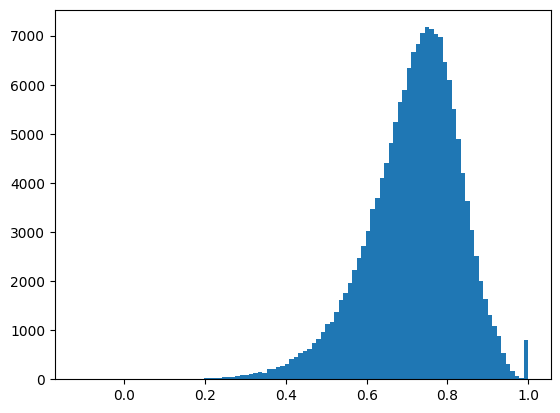

In [11]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [12]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。,59,59,42,0.806263
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...,67,41,49,0.742803
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...,70,61,57,0.740894
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。,30,33,29,0.788314
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。,35,51,41,0.683642
...,...,...,...,...,...,...,...
173261,"To a certain extent, it also sends a sort of m...",そして他のブラッドブルードに「この者は妾の庇護を受けている」といったメッセージを伝える役割もある。,当然某种程度上，也向其他血魔传达了“此人受我保护”这样的讯息。,36,23,26,0.684113
173262,Do you display your companionship in such a ma...,あなたもそういう方法で友情を表現するのか、ブラッドブルード？,你也用这种方式表现友谊吗，血魔？,19,14,14,0.748037
173266,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。,36,30,24,0.807201
173268,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。,23,17,16,0.605154


In [13]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/ArknightsStory.parquet', index=False)

In [14]:
# load parquet
df = pd.read_parquet('parquet/ArknightsStory.parquet')
df

,en,ja,zh
0,"In the Grand Knight Territory, Margaret asks a...",大騎士領内。祖父の墓参りから戻ったマーガレットが過去について老騎士らに問う。一方荒野では、旧...,大骑士领内，给祖父扫墓归来的玛嘉烈问起旧事。荒野上，告别了旧友的玛恩纳和托兰谈论前路。
1,Deszcz the attorney's business trip is heavily...,車の故障により、弁護士デーシュットの予定は大幅に遅れていた。自分のせいで叩き売られようとして...,由于车辆意外故障，律师黛丝特的行程严重耽搁。这个即将因她而被低价卖掉的村庄留宿她一晚，她看见...
2,Flametail and Ashlock head for border city Dzw...,国境都市ズウォネクを訪れたフレイムテイルとアッシュロックは、現地の感染者が扇動されていること...,焰尾和灰毫前往边境城市茨沃涅克，发现此地的感染者正受人煽动。唯一与她们友善沟通的感染者被迫背...
3,"Laying low in Dzwonek, Szewczyk gets dragged i...",人目を忍ぶためズウォネクへ越してきたシェブチックは、学校帰りの息子を迎えに行く途中で爆発事件...,搬到茨沃涅克避风头的瑟奇亚克只是去接儿子放学，却被卷入一场爆炸之中。
4,"His plot revealed, Czcibor heads down a path o...",陰謀が暴かれ、後戻りできないことを悟った騎士団長シチボルは、自らの意地を通すことを決意する。...,阴谋败露，自知没有回头路的骑士团长切斯柏一意孤行，而玛恩纳等在他前去拦截刺杀目标的路上。
...,...,...,...
139423,"To a certain extent, it also sends a sort of m...",そして他のブラッドブルードに「この者は妾の庇護を受けている」といったメッセージを伝える役割もある。,当然某种程度上，也向其他血魔传达了“此人受我保护”这样的讯息。
139424,Do you display your companionship in such a ma...,あなたもそういう方法で友情を表現するのか、ブラッドブルード？,你也用这种方式表现友谊吗，血魔？
139425,"Of course, if you're willing to sign on a disc...",もちろん、そなたらが免責事項にサインをして妾の実験に参加してくれるというのであれば、妾は断り...,当然你们要是愿意在免责声明上签下名字参加我的实验，我也是不会拒绝的啦。
139426,I think I gotta go to rehearsal too. Me and Mu...,あたしもリハーサルしなきゃ……マドロックさん、行きましょう。,我好像也要排练来着，泥岩我们一起走吧。
